### 1. Linear regression with 'Galton' data:

In [1]:
#import librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1. Read in data and visualize:

In [5]:
df = pd.read_csv('/Users/alfahwun/Downloads/data_galton.csv', header='infer')

In [6]:
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [7]:
# There are many repeated values.
# So, we summarize as a cross table.
myTable = pd.crosstab(df.parent,df.child)
myTable

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [10]:
# Transform the cross table so that it could be displayed as a Scatter plot.
# Size of point = Frequency.
nrows = myTable.shape[0]
ncols = myTable.shape[1]
childHeights = list(myTable.columns)
parentHeights = list(myTable.index)
combo = [ (x,y,myTable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])

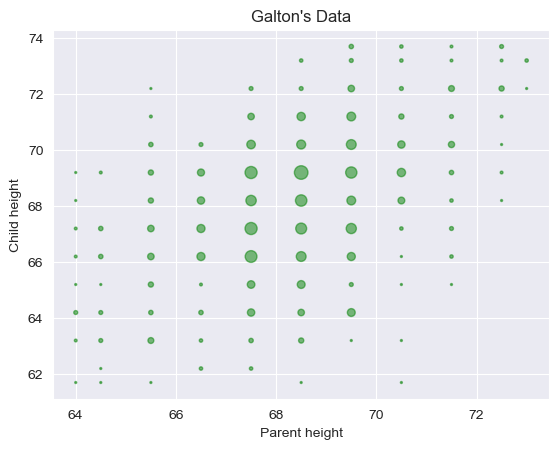

In [11]:
# Show the Scatter plot.
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

<AxesSubplot: ylabel='Count'>

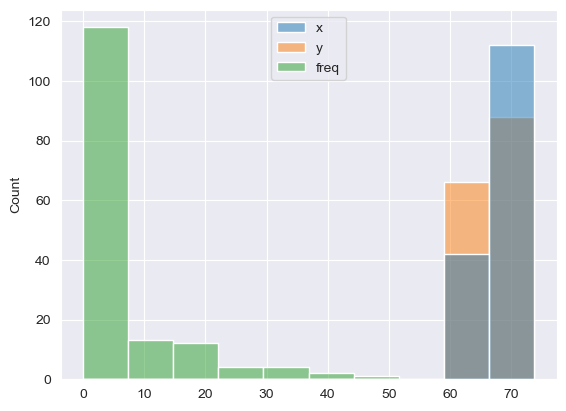

In [12]:
#Show a histogram
sns.histplot(combo)

<AxesSubplot: ylabel='freq'>

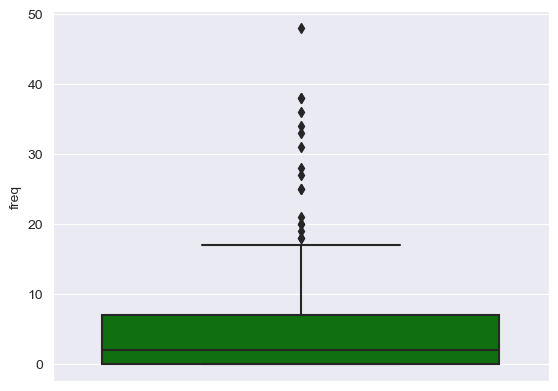

In [13]:
#Show box plot
sns.boxplot(data=combo,y='freq',color='g')


#### 1.2. Linear regression training:

In [14]:
# Instantiate a linear regression object.
X=combo[['x','y']]
y=combo['freq']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4)
model=LinearRegression()



In [15]:
model.fit(x_train,y_train)
predicted=model.predict(x_test)

In [16]:
# Show the intercept.
print("intercept", model.intercept_)

intercept -1.5175156371581195


In [17]:
# Show the slope.
print("slope", model.coef_)


slope [ 0.12361956 -0.01526187]


In [18]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 100.35510663817801
R squared -0.015777925016144723


#### 1.3. Visualization of the regression line:

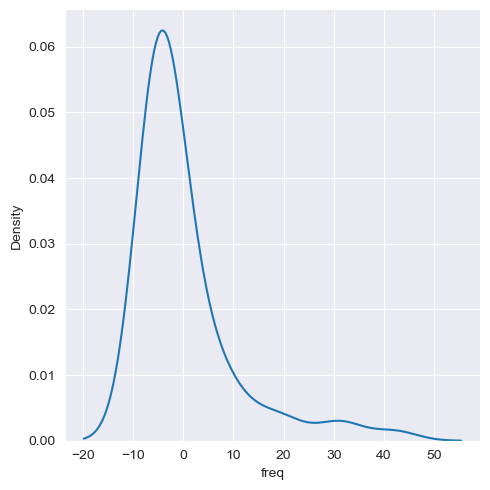

In [19]:
# Predicted Y.
residuals = y_test - predicted
sns.displot(residuals, kind='kde')


<AxesSubplot: xlabel='freq'>

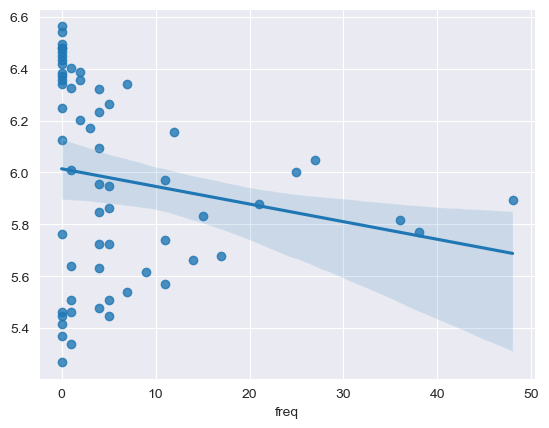

In [23]:
# Show the Scatter plot + Regression line.
sns.regplot(x = y_test, y = predicted , data=df)
